# **1. Знайомство з набором даних**

1.1 Завантажте набір даних з файлу `points2D_2classes.csv` у numpy-масив `data`, 
використовуючи функцію `np.genfromtxt` (використайте опції `skip_header` 
і `delimiter`). Перевірте вміст масиву, а також його форму за допомогою
атрибуту `.shape`.

In [2]:
import numpy as np
data=np.genfromtxt('points2D_2classes.csv',delimiter=',',skip_header=1)
data, data.shape

(array([[ 2.27551541,  0.14403283,  1.        ],
        [-1.36358516,  0.46172882,  0.        ],
        [-0.34572402,  0.662048  ,  0.        ],
        ...,
        [ 0.41348501,  1.31076382,  0.        ],
        [ 0.66730241,  0.16529108,  0.        ],
        [-0.05372887,  1.47267441,  0.        ]]), (1000, 3))

1.2. Сформуйте із масиву `data` два окремих масиви:

*   масив дійсних чисел X, що містить вхідні ознаки точок (координати), 
*   масив цілих чисел y, що містить значення цільової ознаки – мітки класу 
точок.




In [3]:
X=np.array(data[:,:2])
y=np.array(data[:,2]).astype(int)
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

1.3. За допомогою функції `np.unique` і її опції `return_counts` визначте 
кількісний розподіл точок по класам. Який тривіальний умоглядний 
класифікатор міг би прогнозувати клас вхідної точки з точністю (`accuracy`) 
60% ?

In [4]:
np.unique(y, return_counts=1)

(array([0, 1]), array([600, 400]))

1.4 Побудуйте діаграму розсіювання (`scatter plot`) для координат точок так, щоб 
точки різних класів відображались різними кольорами. Для цього 
скористайтесь функцією `plt.scatter` бібліотеки **matplotlib** і її параметром 
`c`. Для кращого спостереження точок, що накладаються одна на одну, 
рекомендується встановити параметри `alpha=0.7` та `edgecolors='k'`. 
Кольорову карту можна задати параметром cmap (рекомендована карта 
`'jet'`). Для збільшення розміру графіка у вхідній комірці перед викликом 
функції `plt.scatter` слід записати, наприклад, таку команду 
`plt.figure(figsize=(9, 6))`. Для блокування виводу зазвичай 
непотрібної для користувача текстової інформації про об'єкт, що повертає 
остання графічна команда, поставте знак `;` одразу після команди. 
Примітка: встановити кольорову карту за замовченням можна, наприклад, 
командою `plt.rcParams['image.cmap']='jet'`.

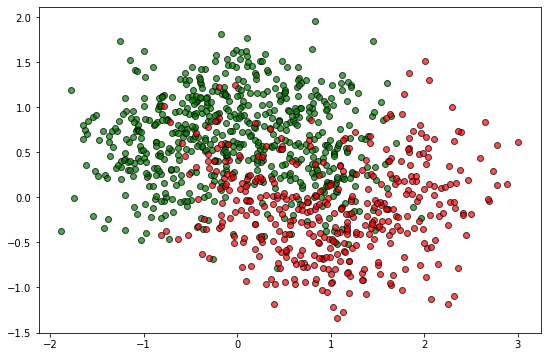

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
class1=data[np.where(data[:,2]==1)][:,:2];
class0=data[np.where(data[:,2]==0)][:,:2];


plt.scatter(class0[:,0],class0[:,1], c='g', cmap='jet', alpha=0.7, edgecolors='k')
plt.scatter(class1[:,0],class1[:,1], c='r', cmap='jet', alpha=0.7, edgecolors='k')

#**2. Розбиття набору даних на навчальну і тестову вибірки**
2.1. Для можливості коректної оцінки якості побудованих у подальшому 
моделей проведіть розділення повного набору маркованих даних на 
навчальну і тестову вибірки. Використовуючи функцію `train_test_split` з 
параметром `test_size=0.3`, створіть масиви `X_train`, `X_test`, `y_train`,
`y_test`. Для збереження співвідношення кількостей точок різних класів у
навчальній і тестовій вибірках використайте параметр `stratify=y`.

Перевірте співвідношення кількостей точок різних класів у масивах `y`,
`y_train`, `y_test`.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
len(y_test)/len(y),len(y_train)/len(y)

(0.3, 0.7)

2.2 У щойно створену комірку після виклику функції `train_test_split` вставте 
код, що будує діаграми розсіювання для навчальної і тестової вибірок окремо. Щоб діаграми створювались на окремих рисунках (а не на одному)
потрібно між функціями побудови діаграм `plt.scatter` вставити
вищезгадану функцію `plt.figure` або команду `plt.show()`, що призведе
до створення окремого рисунку для побудови другої діаграми.

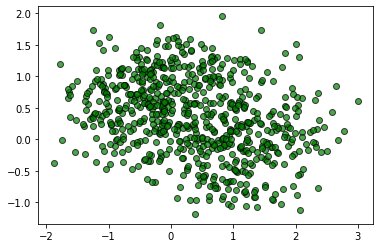

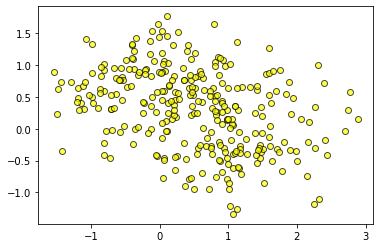

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
len(y_test)/len(y),len(y_train)/len(y)
plt.scatter(X_train[:,0],X_train[:,1], c='g', cmap='jet', alpha=0.7, edgecolors='k')
plt.show()
plt.scatter(X_test[:,0],X_test[:,1], c='yellow', cmap='jet', alpha=0.7, edgecolors='k')

2.3. Використання необов'язкового параметру random_state дозволяє
встановити базу (`seed`) генератора псевдовипадкових чисел у задане ціле
число і, таким чином, фіксує послідовність випадкових чисел, що
генеруються під час формування навчальної і тестової вибірок. Це дозволяє
відтворювати результати при повторних обчисленнях. За замовченням
`random_state=None`, що означає, що база генератора не встановлюється.

Шляхом кількакратних обчислень комірки, що створює і відображає на
діаграмі розсіювання вибірки, практично з'ясуйте вплив встановленого
значення параметра `random_state` на результати розбиття даних.

2.4. Виконайте розбиття даних на навчальну і тестову вибірки при
`random_state=0` і надалі використовуйте саме цей варіант сформованих
масивів `X_train`, `X_test`, `y_train`, `y_test`.

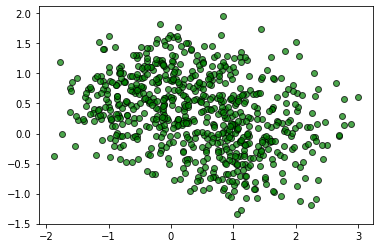

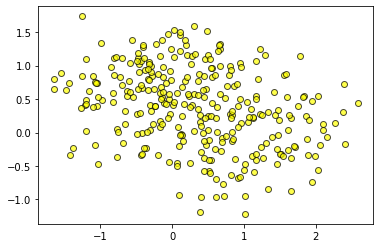

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
plt.scatter(X_train[:,0],X_train[:,1], c='g', cmap='jet', alpha=0.7, edgecolors='k')
plt.show()
plt.scatter(X_test[:,0],X_test[:,1], c='yellow', cmap='jet', alpha=0.7, edgecolors='k')